<h1>Power Produced by Solar Panel in Surabaya</h1>

<p>by @syahrulmwijaya</p>

<p>In this notebook we will do modelling and forecasting on much is a power can be produced by a metersquare solar panel</p>

<h2>Importing Necessary Modules</h2>

In [3]:
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb
import calmap

import warnings
warnings.filterwarnings('ignore')

<h2>Reading PreProcessing Data</h2>

In [4]:
df = pd.read_excel("sunshine surabaya/data surabaya 2022.xlsx", parse_dates = ['Tanggal'], index_col = 'Tanggal')
df = df.rename(columns = {'Tavg':'avgTemp', 'RH_avg':'avgHumidity', 'RR':'rainfall', 'ss':'sunshineDuration', 'ff_avg':'avgWindspeed'})
df.head()

,avgTemp,avgHumidity,rainfall,sunshineDuration,avgWindspeed
Tanggal,,,,,
2022-01-01,27.8,82,13.7,5.0,1
2022-02-01,26.9,84,2.7,4.5,1
2022-03-01,28.0,81,23.0,5.3,1
2022-04-01,28.6,78,13.8,2.4,1
2022-05-01,27.9,78,0.0,2.2,1


<h3>PreProcessing Data</h3>

<p>since we knew that on the origina data there are some cell that filled with "8888" wich mean that in that day there is no measuring event on a specific column, so we have to get rid of it and fill the missing value</p>

In [5]:
def lookupData(df):
    for column in df.columns:
        sum8888 = df[column].eq(8888).sum()
        nullval = df[column].isna().sum()
        print(f'in column {column} there are {sum8888} unmeasured value and {nullval} missing value')

In [6]:
lookupData(df)

in column avgTemp there are 0 unmeasured value and 0 missing value
in column avgHumidity there are 0 unmeasured value and 0 missing value
in column rainfall there are 0 unmeasured value and 0 missing value
in column sunshineDuration there are 0 unmeasured value and 0 missing value
in column avgWindspeed there are 0 unmeasured value and 0 missing value


In [7]:
df = df.replace(8888, np.nan)
lookupData(df)

in column avgTemp there are 0 unmeasured value and 0 missing value
in column avgHumidity there are 0 unmeasured value and 0 missing value
in column rainfall there are 0 unmeasured value and 0 missing value
in column sunshineDuration there are 0 unmeasured value and 0 missing value
in column avgWindspeed there are 0 unmeasured value and 0 missing value


In [8]:
imputer = IterativeImputer(max_iter=10, tol=0.001, estimator=RandomForestRegressor())
imputed_data = imputer.fit_transform(df)
imputed_data

array([[27.8, 82. , 13.7,  5. ,  1. ],
       [26.9, 84. ,  2.7,  4.5,  1. ],
       [28. , 81. , 23. ,  5.3,  1. ],
       ...,
       [27.2, 86. , 14.8,  6.7,  2. ],
       [25.9, 88. ,  0. ,  0. ,  2. ],
       [25.7, 90. ,  8.1,  0. ,  1. ]])

In [9]:
imputed_df = pd.DataFrame(imputed_data)
imputed_df.index = df.index
imputed_df.columns = df.columns
imputed_df.head()

,avgTemp,avgHumidity,rainfall,sunshineDuration,avgWindspeed
Tanggal,,,,,
2022-01-01,27.8,82.0,13.7,5.0,1.0
2022-02-01,26.9,84.0,2.7,4.5,1.0
2022-03-01,28.0,81.0,23.0,5.3,1.0
2022-04-01,28.6,78.0,13.8,2.4,1.0
2022-05-01,27.9,78.0,0.0,2.2,1.0


In [10]:
lookupData(imputed_df)

in column avgTemp there are 0 unmeasured value and 0 missing value
in column avgHumidity there are 0 unmeasured value and 0 missing value
in column rainfall there are 0 unmeasured value and 0 missing value
in column sunshineDuration there are 0 unmeasured value and 0 missing value
in column avgWindspeed there are 0 unmeasured value and 0 missing value


<p>from the output above we can clearly see that we have succeeded remove all the 8888 value and also all the missing value</p>

<h2>Explaratory Data Analysis</h2>

Text(0.5, 1.0, 'avgWindspeed')

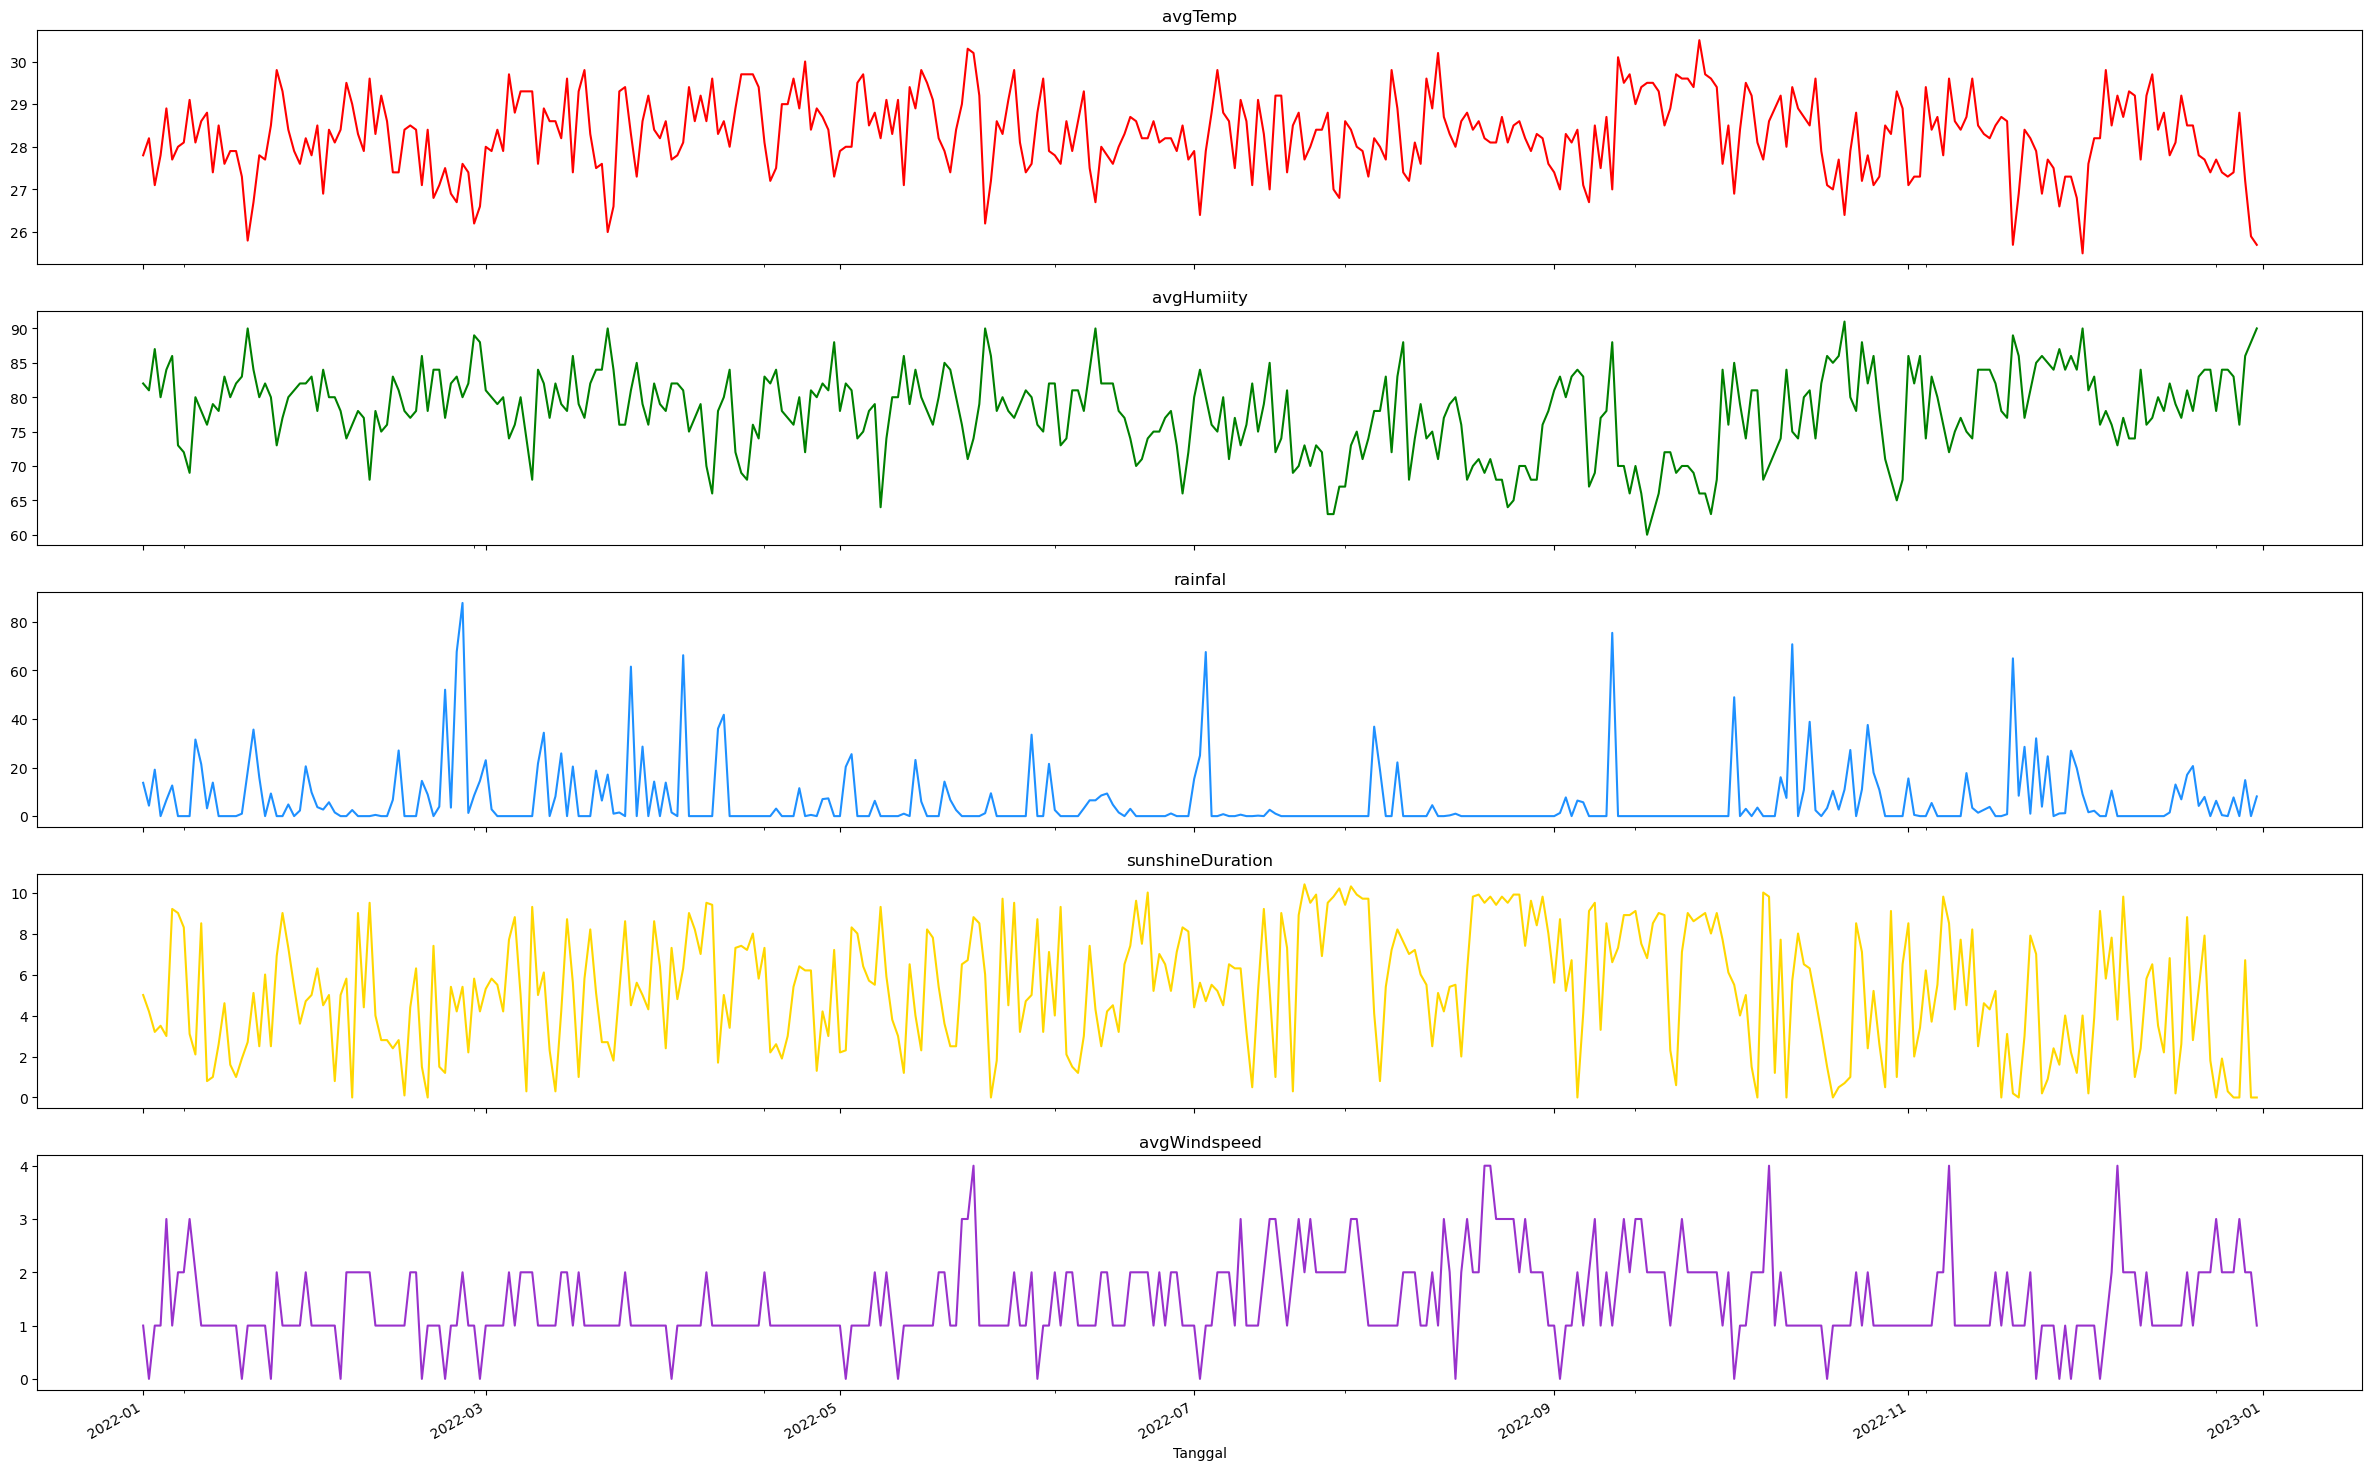

In [11]:
fig, axs = plt.subplots(5,1, figsize=(30,20), sharex=True)
imputed_df['avgTemp'].plot(ax=axs[0], color='r')
axs[0].set_title('avgTemp')
imputed_df['avgHumidity'].plot(ax=axs[1], color='green')
axs[1].set_title('avgHumiity')
imputed_df['rainfall'].plot(ax=axs[2], color='dodgerblue')
axs[2].set_title('rainfal')
imputed_df['sunshineDuration'].plot(ax=axs[3], color='gold')
axs[3].set_title('sunshineDuration')
imputed_df['avgWindspeed'].plot(ax=axs[4], color='darkorchid')
axs[4].set_title('avgWindspeed')

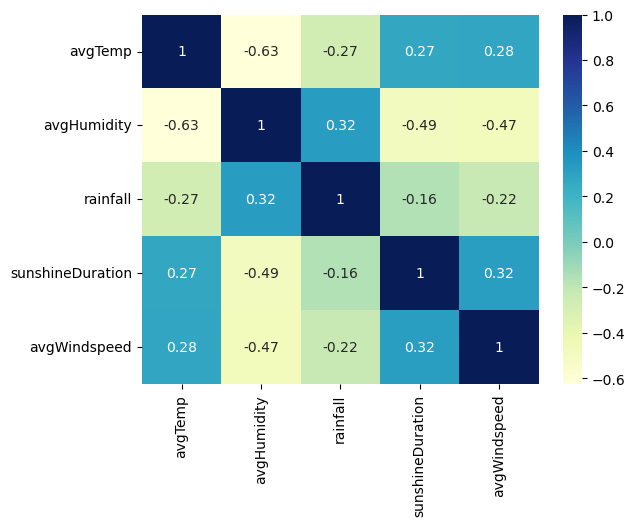

In [12]:
# compute the correlation matrix
corr_matrix = imputed_df.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# show the plot
plt.show()

In [13]:
imputed_df

,avgTemp,avgHumidity,rainfall,sunshineDuration,avgWindspeed
Tanggal,,,,,
2022-01-01,27.8,82.0,13.7,5.0,1.0
2022-02-01,26.9,84.0,2.7,4.5,1.0
2022-03-01,28.0,81.0,23.0,5.3,1.0
2022-04-01,28.6,78.0,13.8,2.4,1.0
2022-05-01,27.9,78.0,0.0,2.2,1.0
...,...,...,...,...,...
2022-12-27,27.4,83.0,7.7,0.0,2.0
2022-12-28,28.8,76.0,0.0,0.0,3.0
2022-12-29,27.2,86.0,14.8,6.7,2.0


<h2>Plot as Calendar</h2>

<h3>The sunshine duration for the whole year of 2022</h3>

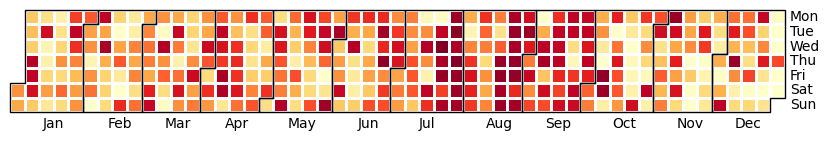

In [14]:
events = imputed_df.groupby("Tanggal")["sunshineDuration"]
fig, axs = plt.subplots(figsize=(10, 10))
for i, year in enumerate([2022]):
    calmap.yearplot(
        events, year=year, cmap="YlOrRd", monthly_border=True
    )

<h3>The average temperature for the whole year of 2022</h3>

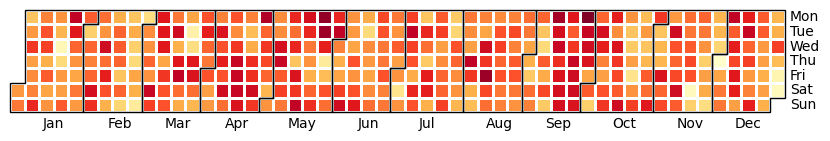

In [15]:
events = imputed_df.groupby("Tanggal")["avgTemp"]
fig, axs = plt.subplots(figsize=(10, 10))
for i, year in enumerate([2022]):
    calmap.yearplot(
        events, year=year, cmap="YlOrRd", monthly_border=True
    )

<h3>The average humidity percentage for the whole year of 2022</h3>

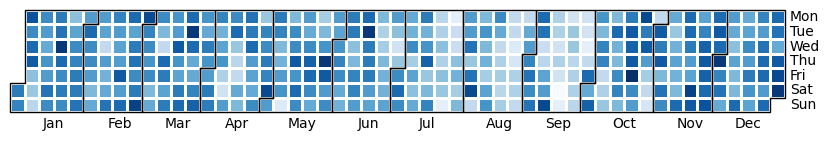

In [16]:
events = imputed_df.groupby("Tanggal")["avgHumidity"]
fig, axs = plt.subplots(figsize=(10, 10))
for i, year in enumerate([2022]):
    calmap.yearplot(
        events, year=year, cmap="Blues", monthly_border=True
    )

<h3>The rainfall percentage percentage for the whole year of 2022</h3>

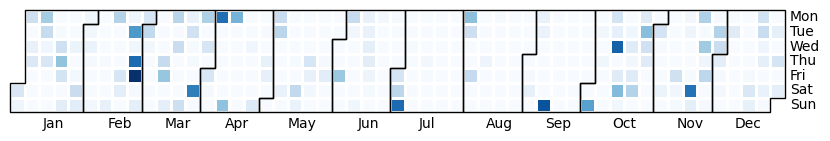

In [17]:
events = imputed_df.groupby("Tanggal")["rainfall"]
fig, axs = plt.subplots(figsize=(10, 10))
for i, year in enumerate([2022]):
    calmap.yearplot(
        events, year=year, cmap="Blues", monthly_border=True
    )

<h2>Modelling</h2>

<p>Defining the value for the modelling part</p>

In [18]:
#define the value
lags = [7, 28, 3*28]
windows = [7, 28]
first = 1942 # first to predict
length = 28

In [19]:
imputed_df.columns

Index(['avgTemp', 'avgHumidity', 'rainfall', 'sunshineDuration',
       'avgWindspeed'],
      dtype='object')

In [20]:
def demand_features(df):
    
    for lag in lags:
        df[f'lag_t{lag}'] = df[df.columns[2]].shift(7).astype("float32") #to give lag to the datas
        
        for w in windows:
            df[f'rolling_mean_lag{lag}_w{w}'] = df[f'lag_t{lag}'].rolling(28).mean().astype("float32") #to make a window based on the given lag
    return df

In [21]:
def demand_features_eval(df):
    
    out = df.groupby(df.columns[0], sort=False).last()
    for lag in lags:
        out[f'lag_t{lag}'] = df.groupby(df.columns[0], sort=False)[df.columns[3]].nth(-lag-1).astype("float32")
        for w in wondows:
            out[f'rolling_mean_lag{lag}_w{w}'] = df.groupby(df.columns[0], sort=False)[df.columns[3]].nth(list(range(-lag-w, -lag))).groupby(df.columns[0], sort=False).mean().astype("float32")
    
    return out.reset_index()

In [22]:
lagged = imputed_df.groupby(imputed_df.columns[0], sort=False).last()
lagged.head(40)

,avgHumidity,rainfall,sunshineDuration,avgWindspeed
avgTemp,,,,
27.8,83.0,4.2,5.3,2.0
26.9,86.0,3.9,0.2,1.0
28.0,84.0,0.0,3.4,1.0
28.6,77.0,0.0,2.3,1.0
27.9,85.0,32.0,7.0,0.0
28.1,79.0,13.0,0.2,1.0
28.2,81.0,1.0,7.9,2.0
27.4,83.0,7.7,0.0,2.0
28.5,78.0,20.6,2.8,1.0


In [23]:
def fit_model(train, valid):
    """ Fit LightGBM model """
     
    params = {
        'metric': 'rmse',
        'objective': 'poisson',
        'seed': 200,
        'force_row_wise' : True,
        'learning_rate' : 0.08,
        'lambda': 0.1,
        'num_leaves': 63,
        'sub_row' : 0.7,
        'bagging_freq' : 1,
        'colsample_bytree': 0.7
    }

    fit = lgb.train(params, 
                    train, 
                    num_boost_round = 2000, 
                    valid_sets = [valid], 
                    early_stopping_rounds = 200,
                    verbose_eval = 100)
    
    lgb.plot_importance(fit, importance_type="gain", precision=0, height=0.5, figsize=(6, 10));
    
    return fit

In [24]:
def pred_all(fit, test, x):
    """ Calculate predictions """
    
    # Recursive prediction
    for i, day in enumerate(np.arange(FIRST, FIRST + LENGTH)):
        test_day = demand_features_eval(test[(test.d <= day) & (test.d >= day - max(LAGS) - max(WINDOWS))])
        test.loc[test.d == day, "demand"] = fit.predict(test_day[x])
    
    return test